## Agent-based model

In [2]:
from numpy.random import randint, rand
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

In [3]:
class Person():
    """
    An agent representing a person.
    
    By default, a person is susceptible.  
    
    They can become removed using the remove method. 
    
    They can become infected using the infected mothod.
    
    """
    
    def __init__(self):
        self.state = "S" 
    
    def get_state(self):
        """
        returns the state of a person:"S","I" or "R"
        """
        return self.state

    
    def remove(self):
        """
        to make a person recovered
        """
        self.state = "R"
        
    def infected(self):
        """
        to make a person infected
        """
        self.state = "I"
        

In [4]:
def count_infectious(pop):
    """
    count how many people are infectious at the end of the day
    
    """
    return sum((p.get_state() == "I") for p in pop)

def count_removed(pop):
    """
    count how many people are recovered at the end of the day
    
    """
    return sum((p.get_state() == "R") for p in pop)

def count_susceptible(pop):
    """
    count how many people are susceptible at the end of the day
    
    """
    return sum((p.get_state() == "S") for p in pop)


In [5]:
def sir_model_simulation(N, b, k, T):    
    """
    simulate a population, where people interact and change state according to the model parameters.
    
    N: N individuals the population has
    
    b: the number of interactions each day that could spread the disease (per individual)
    
    k: the fraction of the infectious population which recovers each day
    
    T: simulation time period
    
    """
    pop = [Person() for i in range(N)] # our population
    pop[0].infected()
    counts_I = [count_infectious(pop)]
    counts_R = [count_removed(pop)]
    counts_S = [count_susceptible(pop)]
    
    for t in range(T):
        for i in range(N):
            if pop[i].get_state()=="I":  
                
                contacts = randint(N, size=int(b)+1)
                if b >= 1:
                    for j in contacts[:-1]:
                        if pop[j].get_state()=="S":
                            pop[j].infected()
                            
                j = contacts[-1]
                if (rand() < (b-int(b))) and (pop[j].get_state()=="S"):
                    pop[j].infected()
                           
                
                if rand() < k:
                    pop[i].remove()
                
        # add to our counts
        counts_I.append(count_infectious(pop))
        counts_R.append(count_removed(pop))
        counts_S.append(count_susceptible(pop))
    return counts_I,counts_R,counts_S

In [115]:
def find_intersection(f,g):
    """
    when the situation is discrete, find the datapoint with the closest distance between two functions
    
    when the situation is continuous, find the intersection
    """
    ind = val = 0
    for i,v in enumerate(f):
        if v-g[i] == np.min(abs(f-g)):
            ind = i
            val = g[i]
            break
    return ind, val

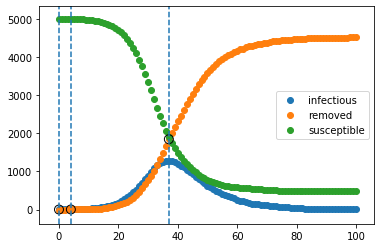

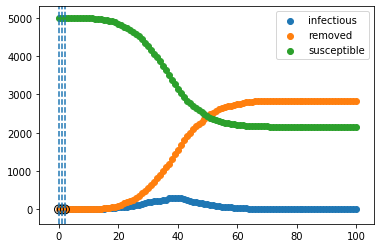

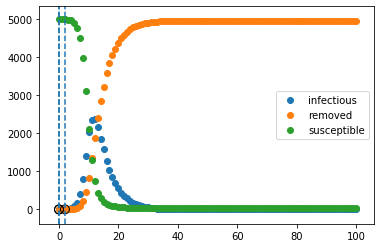

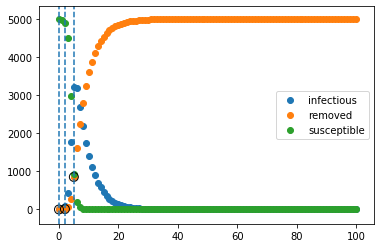

In [117]:
N = 5000
b = [1/3,1/2,1,2]
k = [1/8,1/3,1/5,1/5]
T = 100
for i in range(4):
    counts_I,counts_R,counts_S = sir_model_simulation(N, b[i], k[i], T) 

    S = np.array(counts_S)
    R = np.array(counts_R)
    I = np.array(counts_I)

    plt.scatter(range(T+1),counts_I,label="infectious")
    plt.scatter(range(T+1),counts_R,label="removed")
    plt.scatter(range(T+1),counts_S,label="susceptible")
    plt.scatter(find_intersection(I,R)[0],find_intersection(I,R)[1],s=80, facecolors='none', edgecolors='k')
    plt.axvline(x=find_intersection(I,R)[0],ls='--')
    plt.scatter(find_intersection(I[2:],R[2:])[0]+2,find_intersection(I[2:],R[2:])[1],s=80, facecolors='none', edgecolors='k')
    plt.axvline(x=find_intersection(I[2:],R[2:])[0]+2,ls='--')
    plt.scatter(find_intersection(S,R)[0],find_intersection(S,R)[1],s=80, facecolors='none', edgecolors='k')
    plt.axvline(x=find_intersection(S,R)[0],ls='--')
    #plt.scatter(counts_I.index(0),0,s=100, color='red', edgecolors='k')
    #plt.scatter(counts_S.index(0),0,s=100, color='red', edgecolors='k')
    plt.legend()
    plt.show()   

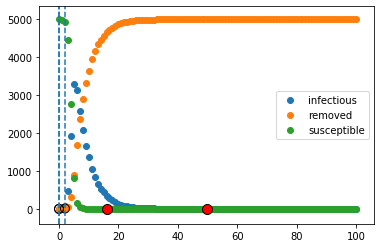

The day when no one is infected is Day 50. 
The day when everyone is infected is Day 16. 


In [118]:
# notice the last plot has the susceptible drop to zero, meaning everyone is eventually infected
b = 2
k = 1/5
counts_I,counts_R,counts_S = sir_model_simulation(N, b, k, T) 

S = np.array(counts_S)
R = np.array(counts_R)
I = np.array(counts_I)

plt.scatter(range(T+1),counts_I,label="infectious")
plt.scatter(range(T+1),counts_R,label="removed")
plt.scatter(range(T+1),counts_S,label="susceptible")
plt.scatter(find_intersection(I,R)[0],find_intersection(I,R)[1],s=80, facecolors='none', edgecolors='k')
plt.axvline(x=find_intersection(I,R)[0],ls='--')
plt.scatter(find_intersection(I[2:],R[2:])[0]+2,find_intersection(I[2:],R[2:])[1],s=80, facecolors='none', edgecolors='k')
plt.axvline(x=find_intersection(I[2:],R[2:])[0]+2,ls='--')
plt.scatter(find_intersection(S,R)[0],find_intersection(S,R)[1],s=80, facecolors='none', edgecolors='k')
plt.axvline(x=find_intersection(S,R)[0],ls='--')
plt.scatter(counts_I.index(0),0,s=100, color='red', edgecolors='k')
plt.scatter(counts_S.index(0),0,s=100, color='red', edgecolors='k')
plt.legend()
plt.show()   
print("The day when no one is infected is Day {}. ".format(counts_I.index(0)))
print("The day when everyone is infected is Day {}. ".format(counts_S.index(0)))

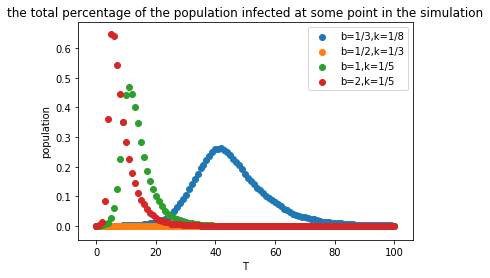

In [141]:
# how does the total percentage of the population infected at some point in the simulation depend on these parameters
N = 5000
b = [1/3,1/2,1,2]
k = [1/8,1/3,1/5,1/5]
T = 100
labels = ['b=1/3,k=1/8', 'b=1/2,k=1/3', 'b=1,k=1/5','b=2,k=1/5']
for i in range(4):
    counts_I[i],counts_R,counts_S = sir_model_simulation(N, b[i], k[i], T) 
    I = np.array(counts_I[i])
    plt.scatter(range(T+1),I/N,label=labels[i])
    
plt.legend(loc = "upper right") 
plt.xlabel("T") 
plt.ylabel("population") 
plt.title("the total percentage of the population infected at some point in the simulation") 
plt.show()  

## Differential Equations

In [86]:
# all scripts used to run code

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, v):
    return [-b * v[0] * v[1], b * v[0] * v[1] - k * v[1], k * v[1]]

def ODE_simulation(N,b,k,T):
    """
    An ODE simulation that model time dependent variables: S, I, R
    
    N: N individuals the population has
    
    b: the number of interactions each day that could spread the disease (per individual)
    
    k: the fraction of the infectious population which recovers each day
    
    T: simulation time period
    
    """
    v0 = [(N-1)/N,1/N,0] ## One person is infectious while others are susceptible
    t_span = [0,T]
    t_eval = list(range(T))
    sol = solve_ivp(f, t_span, v0, t_eval=t_eval)
    return sol

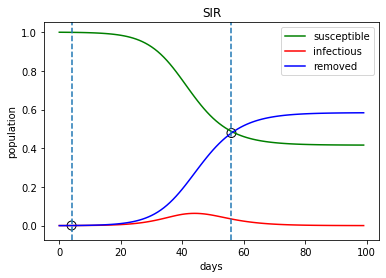

In [106]:
N = 5000
b = 1/2
k = 1/3
T = 100
sol = ODE_simulation(N,b,k,T)
plt.plot(sol.t, sol.y[0], label="susceptible", c='g')
plt.plot(sol.t, sol.y[1], label="infectious", c='r')
plt.plot(sol.t, sol.y[2], label="removed", c='b')
plt.scatter(find_intersection(sol.y[0],sol.y[2])[0],find_intersection(sol.y[0],sol.y[2])[1],s=80, facecolors='none', edgecolors='k')
plt.axvline(x=find_intersection(sol.y[0],sol.y[2])[0],ls='--')
plt.scatter(find_intersection(sol.y[1],sol.y[2])[0],find_intersection(sol.y[1],sol.y[2])[1],s=80, facecolors='none', edgecolors='k')
plt.axvline(x=find_intersection(sol.y[1],sol.y[2])[0],ls='--')
plt.title("SIR")
plt.ylabel("population")
plt.xlabel("days")
plt.legend()
plt.show()

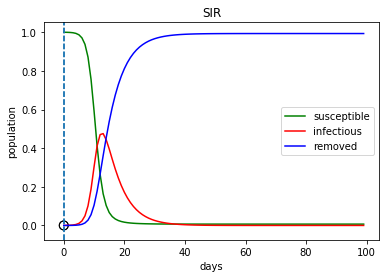

In [119]:
N = 5000
b = 1
k = 1/5
T = 100
sol = ODE_simulation(N,b,k,T)
plt.plot(sol.t, sol.y[0], label="susceptible", c='g')
plt.plot(sol.t, sol.y[1], label="infectious", c='r')
plt.plot(sol.t, sol.y[2], label="removed", c='b')
plt.scatter(find_intersection(sol.y[0],sol.y[2])[0],find_intersection(sol.y[0],sol.y[2])[1],s=80, facecolors='none', edgecolors='k')
plt.axvline(x=find_intersection(sol.y[0],sol.y[2])[0],ls='--')
plt.scatter(find_intersection(sol.y[1],sol.y[2])[0],find_intersection(sol.y[1],sol.y[2])[1],s=80, facecolors='none', edgecolors='k')
plt.axvline(x=find_intersection(sol.y[1],sol.y[2])[0],ls='--')
plt.title("SIR")
plt.ylabel("population")
plt.xlabel("days")
plt.legend()
plt.show()

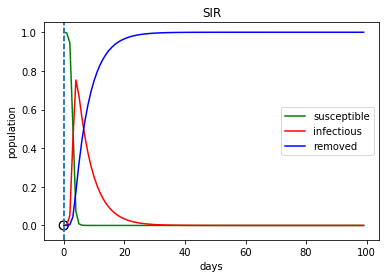

In [134]:
N = 5000
b = 3
k = 1/5
T = 100
sol = ODE_simulation(N,b,k,T)
plt.plot(sol.t, sol.y[0], label="susceptible", c='g')
plt.plot(sol.t, sol.y[1], label="infectious", c='r')
plt.plot(sol.t, sol.y[2], label="removed", c='b')
plt.scatter(find_intersection(sol.y[0],sol.y[2])[0],find_intersection(sol.y[0],sol.y[2])[1],s=80, facecolors='none', edgecolors='k')
plt.axvline(x=find_intersection(sol.y[0],sol.y[2])[0],ls='--')
plt.scatter(find_intersection(sol.y[1],sol.y[2])[0],find_intersection(sol.y[1],sol.y[2])[1],s=80, facecolors='none', edgecolors='k')
plt.axvline(x=find_intersection(sol.y[1],sol.y[2])[0],ls='--')
plt.title("SIR")
plt.ylabel("population")
plt.xlabel("days")
plt.legend()
plt.show()